# 第00xx集  向量


## TL;DR

向量是线性代数中的基本概念，也是机器学习中的基础数据表示形式。例如在对本文进行分词的时候，计算机会文本分词，然后使用向量表示。因为向量很适合在高维空间中表达和处理数据，在机器学习中经常会接触到投影、降维等等概念，都是在向量的基础上进行的。

在$\mathbb{R}^n$空间中定义的向量$\vec{\mathrm{V}}$，可以用一个包含 n 个实数的有序集来表示，即$\vec{\mathrm{V}} = $$\begin{bmatrix}\mathcal{v}_1\\\mathcal{v}_2\\{\vdots}\\\mathcal{v}_n\end{bmatrix}$，这个有序集里的每一个元素称为向量的**分量**。例如$\mathbb{R}^2$空间中的向量$\begin{bmatrix}2\\1\end{bmatrix}$，有些地方也会用$(2,1)$或者$<2,1>$这样的形式来表示。对这个向量来绘图如下：

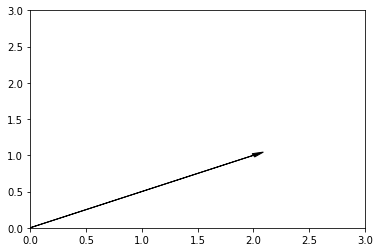

In [4]:
import matplotlib.pyplot as plt

plt.xlim((0, 3))
plt.ylim((0, 3))
ax = plt.axes()
ax.arrow(0, 0, 2, 1, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()

向量的长度定义为：

$$\Vert{\vec{\mathrm{V}}}\Vert = \sqrt{\mathcal{v}_1^{2} + \mathcal{v}_2^{2} + {\cdots} + \mathcal{v}_n^{2}}$$

> 向量长度为 1 的向量称为**单位向量**。

## 基本运算

### 加

向量$\mathbf{a}$与向量$\mathbf{b}$的加法定义为：

$$\mathbf{a} + \mathbf{b} = \begin{bmatrix}{a_1 + b_1}\\{a_2 + b_2}\\{\cdots}\\{a_n + b_n}\end{bmatrix}$$

比如向量$\mathbf{a} = \begin{bmatrix}-1\\2\end{bmatrix}$与向量$\mathbf{b} = \begin{bmatrix}3\\1\end{bmatrix}$相加，值为$\begin{bmatrix}2\\3\end{bmatrix}$：

![向量加](resource/fig3.png)

在Python中，可以直接使用Numpy的ndarray来表示向量。

In [5]:
import numpy as np
a = np.array([-1, 2])
a

array([-1,  2])

In [6]:
b = np.array([3, 1])
b

array([3, 1])

In [7]:
a + b

array([2, 3])

### 乘

* ##### 标量乘向量

标量 $\mathcal{c}$ 乘以向量 $\mathbf{a}$ 定义为：

$$\mathcal{c} \times \mathbf{a} = \begin{bmatrix}\mathcal{c} \times \mathbf{a}_1\\\mathcal{c} \times \mathbf{a}_2\\{\cdots}\\\mathcal{c} \times \mathbf{a}_n\end{bmatrix} = \begin{bmatrix}\mathbf{a}_1 \times \mathcal{c}\\\mathbf{a}_2 \times \mathcal{c}\\{\cdots}\\\mathbf{a}_n \times \mathcal{c}\end{bmatrix}$$

例如向量 $\mathbf{a} = \begin{bmatrix}-1\\2\end{bmatrix}$ 乘以一个标量 *3* 得到 $\begin{bmatrix}-3\\6\end{bmatrix}$ 。



![标量点积向量](resource/fig4.png)

Python的实现如下：

In [8]:
import numpy as np
a = np.array([-1, 2])
a * 3

array([-3,  6])

* ##### 向量点积

向量的点积又叫做**点乘**，定义如下：

$$\vec{\mathbf{a}} \cdot \vec{\mathbf{b}} = \begin{bmatrix}a_1\\a_2\\{\cdots}\\a_n\end{bmatrix} \cdot \begin{bmatrix}b_1\\b_2\\{\cdots}\\b_n\end{bmatrix} = a_1b_1 + a_2b_2 + {\cdots} + a_nb_n$$

可见点积得到的是一个标量。例如：

$$\begin{bmatrix}3\\5\\2\end{bmatrix} \cdot \begin{bmatrix}1\\4\\7\end{bmatrix} = 3 \cdot 1 + 5 \cdot 4 + 2 \cdot 7 = 37$$

Python实现如下：

In [9]:
import numpy as np
a = np.array([3, 5, 2])
b = np.array([1, 4 ,7])
a.dot(b)

37

In [10]:
# 另一种点乘写法
np.dot(a, b)

37

**向量的点积满足乘法交换律、分配律、结合律。**

前面我们已经知道向量的长度定义为：$\Vert{\vec{\mathrm{V}}}\Vert = \sqrt{\mathcal{v}_1^{2} + \mathcal{v}_2^{2} + {\cdots} + \mathcal{v}_n^{2}}$，联系向量点积的定义，我们可以得到：

$$\Vert{\vec{\mathrm{V}}}\Vert = \sqrt{\mathcal{v}_1^{2} + \mathcal{v}_2^{2} + {\cdots} + \mathcal{v}_n^{2}} = \sqrt{\vec{\mathrm{V}} \cdot \vec{\mathrm{V}}}$$

关于向量的点积还有一个非常重要的性质，称为**柯西不等式**，定义如下：

* 对两个非 0 的向量 $\vec{\mathrm{x}},\vec{\mathrm{y}} \in \mathbb{R}^n$，$\vert\vec{\mathrm{x}}\vert \cdot \vert\vec{\mathrm{y}}\vert \le \Vert\vec{\mathrm{x}}\Vert \cdot \Vert\vec{\mathrm{y}}\Vert $。

* 当且仅当$\vec{\mathrm{x}} = \mathcal{c}\vec{\mathrm{y}}$时，等式成立。

参考链接：
* https://www.geogebra.org/m/K4qfDsAN
* https://www.geogebra.org/m/xACNZnd5

* ##### 向量投影

从几何的角度来看，向量的点积与向量间的夹角 $\theta$ 的余弦有关：

$$\vec{\mathbf{a}} \cdot \vec{\mathbf{b}} = \Vert{\vec{\mathrm{a}}}\Vert \Vert{\vec{\mathrm{b}}}\Vert\cos\theta$$


这意味着向量的点积其实反映了向量 $\vec{\mathbf{a}}$ 在向量 $\vec{\mathbf{b}}$ 上的 **投影** ，即两个向量在同个方向上的相同程度。当两向量正交时，$\cos\theta$ 的值为0，点积的值为0，投影最小。当两向量平行时，$\cos\theta$ 的值为1，点积值最大，投影也最大。


![向量投影](resource/fig7.png)



观察上图，$\mathbf{L}$ 是向量 $\vec{\mathbf{v}}$ 两端延伸出来的直线，即：$\mathbf{L} = \mathcal{c}\vec{\mathbf{v}}\vert\mathcal{c}\in\mathbb{R}$。记向量 $\vec{\mathbf{x}}$ 在 $\mathbf{L}$ 上的投影为$Proj_L(\vec{\mathbf{x}})$。根据点积的性质，可得：

$$\begin{align}
(\vec{\mathbf{x}}-\underbrace {  c\vec{\mathbf{v}}}_{ Proj_L({\vec{\mathbf{x}}})  } )\cdot \vec{\mathbf{v}} &= 0 \\\
\vec{\mathbf{x}}\cdot \vec{\mathbf{v}} -c\vec{\mathbf{v}}\cdot \vec{\mathbf{v}} &= 0\\\
c\cdot \vec{\mathbf{v}} \cdot \vec{\mathbf{v}} &= \vec{\mathbf{x}}\cdot \vec{\mathbf{v}}\\\
c &= \frac{\vec{\mathbf{x}}\cdot \vec{\mathbf{v}}}{\vec{\mathbf{v}}\cdot \vec{\mathbf{v}}}
\end{align}$$

有了 c，我们就可以求出投影$Proj_L({\vec{\mathbf{x}}})$：

$$Proj_L({\vec{\mathbf{x}}}) =  c\vec{\mathbf{v}} = (\frac{\vec{\mathbf{x}}\cdot \vec{\mathbf{v}}}{\vec{\mathbf{v}}\cdot \vec{\mathbf{v}}})\vec{\mathbf{v}}$$

例如，向量$\vec{\mathbf{a}} = \begin{bmatrix}1 \\ 2\end{bmatrix}$，向量$\vec{\mathbf{b}} = \begin{bmatrix}1 \\ 1\end{bmatrix}$，那么$\vec{\mathbf{a}}$ 在 $\vec{\mathbf{b}}$ 方向 $\mathbf{L}$ 上的投影为：

$$Proj_L({\vec{\mathbf{a}}}) = c\vec{\mathbf{b}} = (\frac{\vec{\mathbf{a}}\cdot \vec{\mathbf{b}}}{\vec{\mathbf{b}}\cdot \vec{\mathbf{b}}})\vec{\mathbf{b}} = \frac{3}{2}\vec{\mathbf{b}}$$

Python 示例为：

In [12]:
def get_projection(a, b):
    return a.dot(b)*1.0*b/b.dot(b)
a = np.array([1, 2])
b = np.array([2, 2])
get_projection(a, b)

array([ 1.5,  1.5])

* ##### 向量外积

向量的外积（又叫叉乘、向量积、叉积）只在 $\mathbb{R}^{2}$ 和 $\mathbb{R}^{3}$ 中定义：

$\mathbb{R}^{2}$ 的向量外积定义：

$$\begin{bmatrix} a_1 \\ a_2\end{bmatrix} \times \begin{bmatrix} b_1 \\ b_2 \end{bmatrix} = \begin{bmatrix} a_1 \cdot b_2 - a_2 \cdot b_1\end{bmatrix}$$

例如：

$$\begin{bmatrix} 1 \\ 2 \end{bmatrix} \times \begin{bmatrix} 3 \\ 4 \end{bmatrix} =
\begin{bmatrix} 1 \cdot 4 - 3 \cdot 2 \end{bmatrix}= 
\begin{bmatrix}-2\end{bmatrix}$$

$\mathbb{R}^{3}$ 的向量外积定义：

$$\begin{bmatrix} a_1 \\ a_2 \\ a_3\end{bmatrix} \times \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} = \begin{bmatrix} a_2 \cdot b_3 - a_3 \cdot b_2 \\ a_3 \cdot b_1 - a_1 \cdot b_3 \\ a_1 \cdot b_2 - a_2 \cdot b_1\end{bmatrix}$$

例如：

$$\begin{bmatrix} 3 \\ 5 \\ 2 \end{bmatrix} \times \begin{bmatrix} 1 \\ 4 \\ 7 \end{bmatrix} 
=
\begin{bmatrix} 5 \cdot 7 - 2 \cdot 4 \\ 2 \cdot 1 - 3 \cdot 7 \\ 3 \cdot 4 - 5 \cdot 1\end{bmatrix}
= 
\begin{bmatrix} 27 \\ -19 \\ 7\end{bmatrix}$$


可见向量间外积的结果会得到一个新的向量。

Python 示例如下：


In [13]:
import numpy as np
a = np.array([3, 5, 2])
b = np.array([1, 4, 7])
np.cross(a, b)

array([ 27, -19,   7])

外积的一个重要作用是可以得到一个和 $\vec{\mathbf{a}}$ 、$\vec{\mathbf{b}}$ 两个原向量正交的新向量 $\vec{\mathbf{c}}$ ，且可以通过右手法则来确定新向量的方向（一个简单的确定满足“右手定则”的结果向量的方向的方法是这样的：若坐标系是满足右手定则的，当右手的四指从 $\vec{\mathbf{a}}$ 以不超过180度的转角转向 $\vec{\mathbf{b}}$ 时，竖起的大拇指指向是 $\vec{\mathbf{c}}$ 的方向）。

![向量外积](resource/fig6.jpeg)

从几何的角度来说，向量的外积与向量间夹角 $\theta$ 的正弦有关：

$$\left\|\vec{\mathbf{a}}\times\vec{\mathbf{b}}\right\| = \left\|\vec{\mathbf{a}}\right\|\left\|\vec{\mathbf{b}}\right\|sin\theta$$

这意味着向量的外积反映了向量 $\vec{\mathbf{a}}$ 与向量 $\vec{\mathbf{b}}$ 的正交程度。当两向量平行时，$\sin\theta$ 的值为0，外积的值为0，正交程度最小。当两向量正交时，$\sin\theta$ 的值为1，外积值最大，正交程度最大。

* #### 矩阵向量积

当矩阵 $\mathbf{A}$ 的列数与向量 $\vec{\mathbf{x}}$ 的分量数相同时，矩阵和向量的积有定义：

$$\underset{m\times n}{A}\vec{\mathbf{x}}=\begin{bmatrix}a_{11} & a_{12} & \ldots & a_{1n} \\ a_{21} & a_{22} & \ldots & a_{2n} \\ \ldots \\ a_{m1} & a_{m2} & \ldots & a_{mn}\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \ldots \\ x_n \end{bmatrix} = \begin{bmatrix}a_{11}x_1 + a_{12}x_2 + \ldots + a_{1n}x_n \\ a_{21}x_1 + a_{22}x_2 + \ldots + a_{2n}x_n \\ \ldots \\ a_{m1}x_1 + a_{m2}x_2 + \ldots + a_{mn}x_n \\ \end{bmatrix}$$


例如，矩阵 $\mathbf{A} = \begin{bmatrix}4 & 3 & 1 \\ 1 & 2 & 5\end{bmatrix}$ 乘以向量 $\vec{\mathbf{x}} = \begin{bmatrix}5 \\ 2 \\ 7\end{bmatrix}$ 的结果为：

$$\begin{bmatrix}4\cdot 5 + 3\cdot 2 + 1\cdot 7 \\ 1 \cdot 5 + 2 \cdot 2 + 5 \cdot 7\end{bmatrix} = \begin{bmatrix}33 \\ 44\end{bmatrix}$$

Python 示例如下：

In [14]:
a = np.matrix('4 3 1;1 2 5')
x = np.array([[5], [2], [7]])
a*x

matrix([[33],
        [44]])

矩阵向量积可以看做是矩阵的所有列和向量的线性组合：

$$\underset { m\times n }{ \mathbf{A} } \vec { \mathbf{x} } =\begin{bmatrix} \underbrace { \begin{bmatrix} a_{ 11 } \\ a_{ 21 } \\ \ldots \\ a_{ m1 } \end{bmatrix} }_{ \vec { \mathbf{ V }_{ 1 } }  }  & \underbrace { \begin{bmatrix} a_{ 12 } \\ a_{ 22 } \\\ldots  \\ a_{ m2 } \end{bmatrix} }_{ \vec { \mathbf{ V_{ 2 } } }  } & \ldots & \underbrace { \begin{bmatrix} a_{ 1n } \\ a_{ 2n } \\ \ldots \\ a_{ mn } \end{bmatrix} }_{ \vec { \mathbf{ V_{ n } } }  }  \end{bmatrix}\begin{bmatrix} x_{ 1 } \\ x_{ 2 } \\ \ldots \\ x_{ n } \end{bmatrix}=x_1\vec{\mathbf{V}_1}+x_2\vec{\mathbf{V}_2}+\ldots+x_n\vec{\mathbf{V}_n}$$

而向量 $\vec{\mathbf{x}}$ 的每一个分量可以看成是 $\mathbf{A}$ 的每个列向量的加权。

> 一个矩阵其实就是一个线性变换。一个矩阵乘以一个向量后得到的向量，其实就相当于将这个向量进行了线性变换。

## 向量的转置

向量 $\vec{\mathbf{V}} = \underbrace{\begin{bmatrix}v_1 \\ v_2 \\ \ldots \\ v_n \end{bmatrix}}_{n\times 1}$ 的转置定义为 $\vec{\mathbf{V}}^T = \underbrace{\begin{bmatrix}v_1 & v_2 & \ldots & v_n \end{bmatrix}}_{1 \times n}$。例如向量 $\vec{\mathbf{A}} = \begin{bmatrix} 2 & 4 \end{bmatrix}$ 的转置就是 $\vec{\mathbf{A}}^T = \begin{bmatrix} 2 \\ 4\end{bmatrix}$。

Python 示例：

In [1]:
import numpy as np
a = np.array([[2, 4]])
a.T

array([[2],
       [4]])

注意： 上面生命 **a** 时使用了两对 **[]**，是为了生成一个二维向量。一维向量的转置是其本身。例如：

In [2]:
b = np.array([2, 4])
b.T

array([2, 4])

# 线性无关

## 张成空间

一组向量的张成空间简单说就是这些向量随机线性组合后能够表示多少个向量。记为：$span(\vec{\mathbf{a}}, \vec{\mathbf{b}})$。

例如，对于$\mathbb{R}^{2}$空间中两个不平行的非0向量 $\vec{\mathbf{a}} = \begin{bmatrix}2 \\ 1\end{bmatrix}$ 和向量 $\vec{\mathbf{b}} = \begin{bmatrix}0 \\ 3\end{bmatrix}$，$span(\vec{\mathbf{a}}, \vec{\mathbf{b}}) = \mathbb{R}^{2}$。证明如下：

**证明：**  对于 $\mathbb{R}^{2}$ 中的任意向量 $\begin{bmatrix}x \\ y\end{bmatrix}$，假设可以有 $\vec{\mathbf{a}}$ 和 $\vec{\mathbf{b}}$ 线性组合而成，那么有：

$$c_1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix} 0 \\ 3 \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix}$$

进一步转化得到：

$$\left\{
\begin{align}
c_1 \cdot 2 & + c_2 \cdot 0 &= x\\\
c_1 \cdot 1 & + c_2 \cdot 3 &= y
\end{align}
\right.$$

求解此方程得到：

$$\left\{
\begin{align}
c_1 &= \frac{x}{2}\\
c_2 &= \frac{y}{3} - \frac{x}{6}
\end{align}
\right.$$

由于$x$、$y$ 的值已经确定，所以 $c_1$、$c_2$的值也必然唯一。

##  线性相关和线性无关

当一个向量集合里的每个向量都对张成空间有贡献时，称这个向量集合是线性相关的。反之是线性无关的。能够表示一个空间的最少向量组合成为向量的基。

听起来比较难懂，简单点说就是：

假如一个向量集合中存在某个向量能由向量集合里的其他向量线性组合而成，那么这个集合对于张成空间而言就存在多余的向量。此时就是线性相关的；反之，假如集合中每一个元素都没法由其他元素组合而成，那么这个集合每个元素都对张成空间有贡献，这个集合就是线性无关的。

例如，对于上节中的例子，如果再增加一个向量 $\vec{\mathbf{c}} = \begin{bmatrix} 5 \\ 2\end{bmatrix}$，由于 $\vec{\mathbf{c}}$ 可以由 $\vec{\mathbf{a}}$ 和 $\vec{\mathbf{b}}$ 线性组合而成，由 $a$、$b$、$c$ 共同张成的空间并没有发生变化，仍然是 $\mathbb{R}^{2}$，因此称集合 $\left\{\vec{\mathbf{a}}, \vec{\mathbf{b}}, \vec{\mathbf{c}}\right \}$ 线性相关。

## 判断是否线性相关

一个向量集合 $s = {v_1, v_2, \ldots, v_n}$ 线性相关的充要条件是，存在一部分非0系数，使得
$$c_1 v_1 + c_2 v_2 + \ldots + c_n v_n = \mathbf{0} = \begin{bmatrix} 0 \\ 0 \\ \ldots \\ 0\end{bmatrix}$$。

例如有向量 $\begin{bmatrix}2 \\ 1\end{bmatrix}$ 和 $\begin{bmatrix}3 \\ 2\end{bmatrix}$，则可以先写出如下的等式：

$$c_1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix}3 \\ 2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$$

最终求的解 $\begin{bmatrix}c_1 \\ c_2\end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$ ，说明两个向量线性无关，也说明这两个向量可以张成 $\mathbb{R}^{2}$。

类似的，对于三个 $\mathbb{R}^{3}$ 中的向量 $\begin{bmatrix}2 \\ 0 \\ 0\end{bmatrix}$、$\begin{bmatrix}0 \\ 1 \\ 0\end{bmatrix}$、$\begin{bmatrix}0 \\ 0 \\ 7\end{bmatrix}$，通过上述计算法，不难得到这三个向量是线性无关的，他们共同张成了 $\mathbb{R}^{3}$ 空间。

而对于向量集合 $\left\{\begin{bmatrix}2 \\ 1\end{bmatrix}, \begin{bmatrix}3 \\ 2\end{bmatrix}, \begin{bmatrix}1 \\ 2 \end{bmatrix}\right\}$，同样的计算法，可以算出存在非0的系数 $\begin{bmatrix}c_1 \\ c_2 \\ c_3\end{bmatrix} = \begin{bmatrix}-4 \\ 3 \\ -1\end{bmatrix}$ 使得 $c1 \begin{bmatrix}2 \\ 1\end{bmatrix} + c_2 \begin{bmatrix}3 \\ 2\end{bmatrix} + c_3 \begin{bmatrix}1 \\ 2 \end{bmatrix} = \begin{bmatrix}0 \\ 0\end{bmatrix}$。因此集合 $\left\{\begin{bmatrix}2 \\ 1\end{bmatrix}, \begin{bmatrix}3 \\ 2\end{bmatrix}, \begin{bmatrix}1 \\ 2 \end{bmatrix}\right\}$是线性相关的。